In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore') 

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wine-reviews/winemag-data_first150k.csv
/kaggle/input/wine-reviews/winemag-data-130k-v2.json
/kaggle/input/wine-reviews/winemag-data-130k-v2.csv


## Mount Data

In [2]:
data = pd.read_csv("/kaggle/input/wine-reviews/winemag-data-130k-v2.csv")
data.head(3)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm


## isnull() Percent

In [3]:
# get the number of missing data points per column
missing_values_count = data.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count[0:10]

Unnamed: 0         0
country           63
description        0
designation    37465
points             0
price           8996
province          63
region_1       21247
region_2       79460
taster_name    26244
dtype: int64

In [4]:
total_cells = np.product(data.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

11.252620089976116


## Remove/dropping Columns

In [5]:
columns_dropped = data.drop(['region_1', 'region_2', 'taster_name', 'taster_twitter_handle'], axis=1)
columns_dropped.head(10)

,Unnamed: 0,country,description,designation,points,price,province,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
6,6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
7,7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach
8,8,Germany,Savory dried thyme notes accent sunnier flavor...,Shine,87,12.0,Rheinhessen,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,Gewürztraminer,Heinz Eifel
9,9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam


In [6]:
#fill_na = columns_dropped.fillna(0)
#fill_na\

data_cleaned = columns_dropped.dropna(axis=0)
data_cleaned.head(10)

,Unnamed: 0,country,description,designation,points,price,province,title,variety,winery
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
6,6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
8,8,Germany,Savory dried thyme notes accent sunnier flavor...,Shine,87,12.0,Rheinhessen,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,Gewürztraminer,Heinz Eifel
9,9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam
10,10,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19.0,California,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature
15,15,Germany,Zesty orange peels and apple notes abound in t...,Devon,87,24.0,Mosel,Richard Böcking 2013 Devon Riesling (Mosel),Riesling,Richard Böcking
16,16,Argentina,"Baked plum, molasses, balsamic vinegar and che...",Felix,87,30.0,Other,Felix Lavaque 2010 Felix Malbec (Cafayate),Malbec,Felix Lavaque


In [7]:
for col_name in ['country', 'designation', 'price']:
    print(data_cleaned[col_name].value_counts(), '\n')

country
US                        36751
Italy                     11993
France                    11840
Spain                      5257
Portugal                   4381
Chile                      3825
Argentina                  2863
Austria                    2370
Germany                    1962
Australia                  1618
South Africa                718
New Zealand                 667
Israel                      419
Greece                      315
Canada                      176
Hungary                     123
Romania                     114
Uruguay                      95
Bulgaria                     93
England                      69
Turkey                       63
Georgia                      62
Slovenia                     55
Mexico                       53
Moldova                      52
Croatia                      47
Brazil                       46
Lebanon                      30
Morocco                      16
Peru                         16
Ukraine                      12


In [8]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86148 entries, 1 to 129970
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   86148 non-null  int64  
 1   country      86148 non-null  object 
 2   description  86148 non-null  object 
 3   designation  86148 non-null  object 
 4   points       86148 non-null  int64  
 5   price        86148 non-null  float64
 6   province     86148 non-null  object 
 7   title        86148 non-null  object 
 8   variety      86148 non-null  object 
 9   winery       86148 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.2+ MB


## Riserva Wine Typo

In [9]:
riserva_wine = data_cleaned.loc[(data_cleaned.designation == 'Riserva') | (data_cleaned.designation == 'Reserva') | (data_cleaned.designation == 'Reserve')]
riserva_wine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3803 entries, 58 to 129938
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   3803 non-null   int64  
 1   country      3803 non-null   object 
 2   description  3803 non-null   object 
 3   designation  3803 non-null   object 
 4   points       3803 non-null   int64  
 5   price        3803 non-null   float64
 6   province     3803 non-null   object 
 7   title        3803 non-null   object 
 8   variety      3803 non-null   object 
 9   winery       3803 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 326.8+ KB


In [10]:
dict_typo = {'Reserve' : 'Riserva',
             'Reserva' : 'Riserva'}
data_cleaned = data_cleaned.replace(dict_typo)
data_cleaned.head(5)

#Riserva Wine check
riserva_wine_check = data_cleaned.loc[(data_cleaned.designation == 'Reserva') | (data_cleaned.designation == 'Reserve')]
riserva_wine_check

,Unnamed: 0,country,description,designation,points,price,province,title,variety,winery


In [11]:
#Dictionary Fix for Riserva Wine
riserva_wine.head(5)

,Unnamed: 0,country,description,designation,points,price,province,title,variety,winery
58,58,Chile,Lightly herbal strawberry and raspberry aromas...,Reserve,85,13.0,Maipo Valley,Tres Palacios 2011 Reserve Pinot Noir (Maipo V...,Pinot Noir,Tres Palacios
195,195,Italy,"This is a mature, jammy wine with thick layers...",Riserva,87,35.0,Tuscany,Carpineto 2003 Riserva (Vino Nobile di Montep...,Prugnolo Gentile,Carpineto
208,208,South Africa,"A stony, flinty character leads the nose of th...",Reserve,90,40.0,Coastal Region,Delaire Graff 2013 Reserve White (Coastal Region),White Blend,Delaire Graff
233,233,US,"There is an odd, piercing edge to the aromas, ...",Reserve,85,28.0,Oregon,Silvan Ridge 2006 Reserve Pinot Noir (Willamet...,Pinot Noir,Silvan Ridge
245,245,Argentina,Not exactly a world-class white wine but at le...,Reserve,85,12.0,Other,Finca Las Moras 2007 Reserve Chardonnay (San J...,Chardonnay,Finca Las Moras


In [12]:
best_riserva_winery = riserva_wine.groupby(['winery','country', 'title'], as_index='winery')['points'].max()
best_riserva_winery.sort_values(ascending=False)

winery            country  title                                                           
Biondi Santi      Italy    Biondi Santi 2010 Riserva  (Brunello di Montalcino)                 100
Trefethen         US       Trefethen 2005 Reserve Cabernet Sauvignon (Oak Knoll District)       99
Von Strasser      US       Von Strasser 2008 Reserve Red (Diamond Mountain District)            98
Conti Costanti    Italy    Conti Costanti 2010 Riserva  (Brunello di Montalcino)                98
Schramsberg       US       Schramsberg 2004 Reserve Sparkling (Napa-Mendocino-Sonoma-Marin)     98
                                                                                              ... 
Catharine Valley  US       Catharine Valley 2005 Reserve Cabernet Franc (Finger Lakes)          80
Männle            Chile    Männle 2012 Reserva Carmenère (Itata Valley)                         80
Laurel Lake       US       Laurel Lake 1998 Reserve Chardonnay (North Fork of Long Island)      80
Alfasi           

## Which Country Produce most Wine

In [13]:
most_country = data_cleaned['country'].value_counts()
most_country.head(5)

country
US          36751
Italy       11993
France      11840
Spain        5257
Portugal     4381
Name: count, dtype: int64

In [14]:
best_country = data_cleaned.groupby(['country'], as_index=False)['title'].nunique()
best_country.sort_values('title', ascending=False).head(5)

,country,title
38,US,33850
21,Italy,10945
14,France,10480
35,Spain,4738
30,Portugal,4021


<Axes: xlabel='country', ylabel='title'>

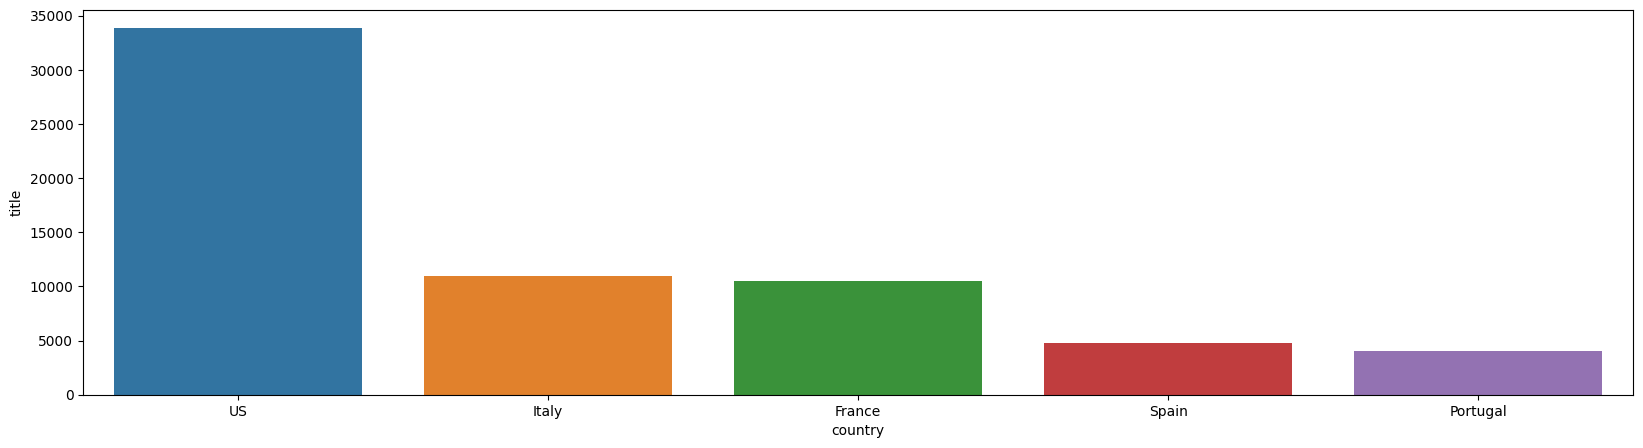

In [15]:
plt.rcParams['figure.figsize'] = (20,5)
sns.barplot(x='country', y='title', data=best_country.sort_values('title', ascending=False).head(5))

## Most Expensive Wine

In [16]:
most_expensive = data_cleaned['price'].max()
most_expensive

2013.0

In [17]:
most_priced = data_cleaned.groupby(['title'], as_index='title').agg({"price" : "max", 'variety':'max'})
most_priced = most_priced.sort_values('price', ascending=False).head(10)
most_priced

,price,variety
title,,
Blair 2013 Roger Rose Vineyard Chardonnay (Arroyo Seco),2013.0,Chardonnay
Emmerich Knoll 2013 Ried Loibenberg Smaragd Grüner Veltliner (Wachau),1100.0,Grüner Veltliner
W. & J. Graham's NV 90-year Old Tawny (Port),1000.0,Port
Kopke 1935 Colheita White (Port),980.0,Port
Biondi Santi 2006 Riserva (Brunello di Montalcino),900.0,Sangiovese Grosso
Penfolds 2008 Grange Shiraz (South Australia),850.0,Shiraz
Penfolds 2010 Grange Shiraz (South Australia),850.0,Shiraz
Henschke 2010 Hill of Grace Shiraz (Eden Valley),820.0,Shiraz
Biondi Santi 2007 Riserva (Brunello di Montalcino),800.0,Sangiovese


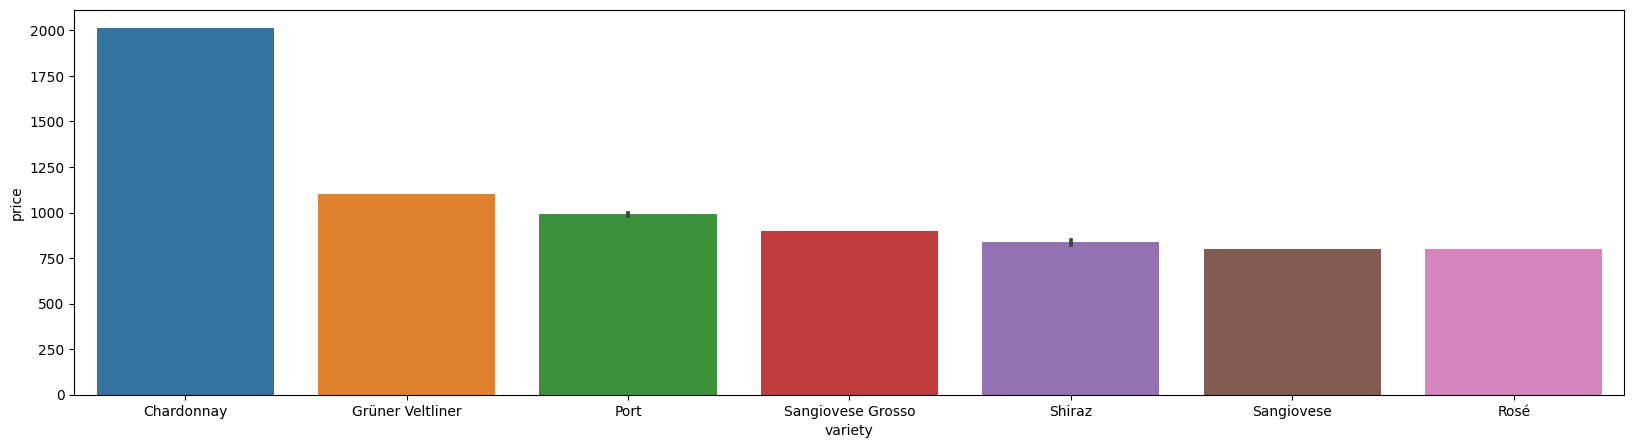

In [18]:
sns.barplot(x='variety', y='price', data=most_priced)
plt.show()

## Bivariate Analysis: Correlation between Points < 100 and Price

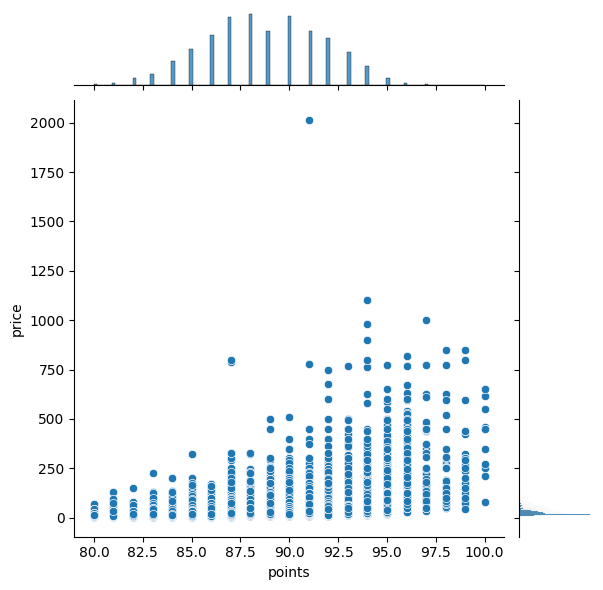

In [19]:
sns.jointplot(x='points',y='price',data=data_cleaned)